In [1]:
import pandas as pd


In [2]:
import os
os.listdir("neemabartibigdata")


['.git',
 '.gitignore',
 'data',
 'Dockerfile',
 'Dockerfile.fetch',
 'LICENSE',
 'notebooks',
 'README.md',
 'requirements.txt',
 'src']

In [3]:
import os
os.listdir("neemabartibigdata/data/raw")


['gdp.csv', 'population.csv']

In [4]:
import pandas as pd

gdp = pd.read_csv("neemabartibigdata/data/raw/gdp.csv")
population = pd.read_csv("neemabartibigdata/data/raw/population.csv")

gdp.head(), population.head()


(  Country Name Country Code  Year         Value
 0  Afghanistan          AFG  2000  3.521418e+09
 1  Afghanistan          AFG  2001  2.813572e+09
 2  Afghanistan          AFG  2002  3.825701e+09
 3  Afghanistan          AFG  2003  4.520947e+09
 4  Afghanistan          AFG  2004  5.224897e+09,
   Country Name Country Code  Year    Value
 0        Aruba          ABW  1960  54922.0
 1        Aruba          ABW  1961  55578.0
 2        Aruba          ABW  1962  56320.0
 3        Aruba          ABW  1963  57002.0
 4        Aruba          ABW  1964  57619.0)

In [5]:
gdp = gdp.rename(columns={"Value": "GDP"})
population = population.rename(columns={"Value": "Population"})



In [6]:
gdp.head()

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,2000,3.521418e+09
1,Afghanistan,AFG,2001,2.813572e+09
2,Afghanistan,AFG,2002,3.825701e+09
3,Afghanistan,AFG,2003,4.520947e+09
4,Afghanistan,AFG,2004,5.224897e+09


In [7]:
population.head()


,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,54922.0
1,Aruba,ABW,1961,55578.0
2,Aruba,ABW,1962,56320.0
3,Aruba,ABW,1963,57002.0
4,Aruba,ABW,1964,57619.0


In [8]:
merged = pd.merge(
    gdp,
    population,
    on=["Country Name", "Country Code", "Year"],
    how="inner"
)

merged.head()


,Country Name,Country Code,Year,GDP,Population
0,Afghanistan,AFG,2000,3.521418e+09,20130327.0
1,Afghanistan,AFG,2001,2.813572e+09,20284307.0
2,Afghanistan,AFG,2002,3.825701e+09,21378117.0
3,Afghanistan,AFG,2003,4.520947e+09,22733049.0
4,Afghanistan,AFG,2004,5.224897e+09,23560654.0


In [9]:
merged["GDP_per_capita"] = merged["GDP"] / merged["Population"]
merged.head()


,Country Name,Country Code,Year,GDP,Population,GDP_per_capita
0,Afghanistan,AFG,2000,3.521418e+09,20130327.0,174.930991
1,Afghanistan,AFG,2001,2.813572e+09,20284307.0,138.706822
2,Afghanistan,AFG,2002,3.825701e+09,21378117.0,178.954088
3,Afghanistan,AFG,2003,4.520947e+09,22733049.0,198.871116
4,Afghanistan,AFG,2004,5.224897e+09,23560654.0,221.763654


In [10]:
year = 2020
data_2020 = merged[merged["Year"] == year]


In [11]:
top10 = data_2020.nlargest(10, "GDP")
top10


,Country Name,Country Code,Year,GDP,Population,GDP_per_capita
13818,World,WLD,2020,8.557772e+13,7.856139e+09,10893.101630
5298,High income,HIC,2020,5.579113e+13,1.389525e+09,40151.228261
9695,OECD members,OED,2020,5.285290e+13,1.370014e+09,38578.365914
10435,Post-demographic dividend,PST,2020,5.000490e+13,1.117765e+09,44736.494866
5610,IDA & IBRD total,IBT,2020,3.252859e+13,6.667541e+09,4878.648205
5546,IBRD only,IBD,2020,3.010386e+13,4.879367e+09,6169.623283
7522,Low & middle income,LMY,2020,2.949192e+13,6.438170e+09,4580.792561
8621,Middle income,MIC,2020,2.905174e+13,5.758609e+09,5044.922995
3213,East Asia & Pacific,EAS,2020,2.715648e+13,2.369439e+09,11461.145889
9514,North America,NAC,2020,2.298552e+13,3.696200e+08,62186.907634


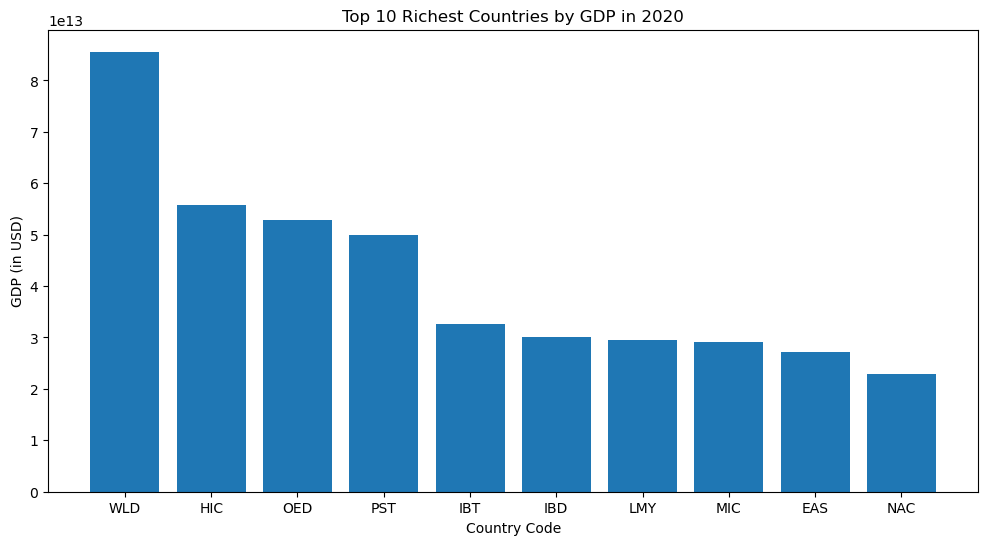

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(top10["Country Code"], top10["GDP"])
plt.title(f"Top 10 Richest Countries by GDP in {year}")
plt.xlabel("Country Code")
plt.ylabel("GDP (in USD)")
plt.xticks(rotation=0)
plt.show()


In [13]:
#GDP Over Time  

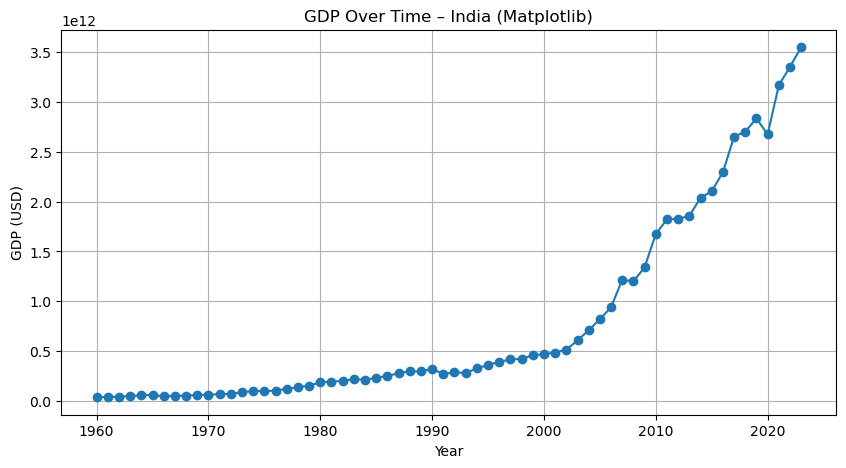

In [14]:
import matplotlib.pyplot as plt

country = merged[merged["Country Code"] == "IND"]

plt.figure(figsize=(10,5))
plt.plot(country["Year"], country["GDP"], marker="o")
plt.title("GDP Over Time – India (Matplotlib)")
plt.xlabel("Year")
plt.ylabel("GDP (USD)")
plt.grid(True)
plt.show()


In [15]:
#Population Over Time 

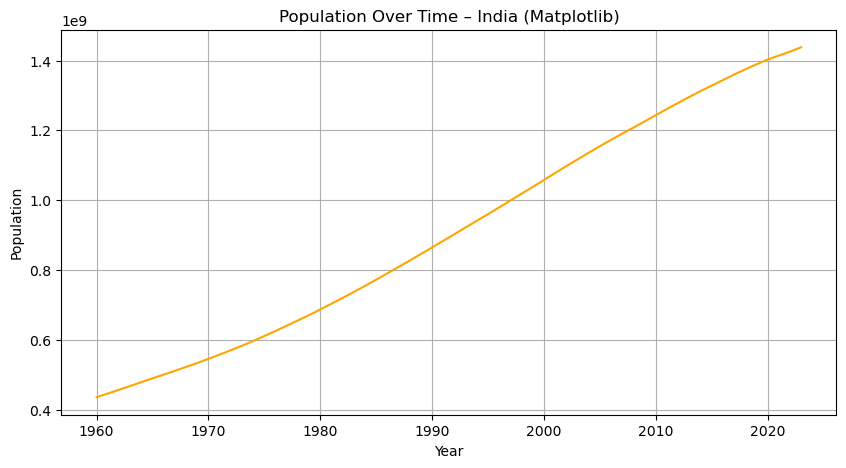

In [16]:
plt.figure(figsize=(10,5))
plt.plot(country["Year"], country["Population"], color="orange")
plt.title("Population Over Time – India (Matplotlib)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.show()


In [17]:
##Seaborn Visualizations (Correlations + Distributions)
#Correlation Heatmap 

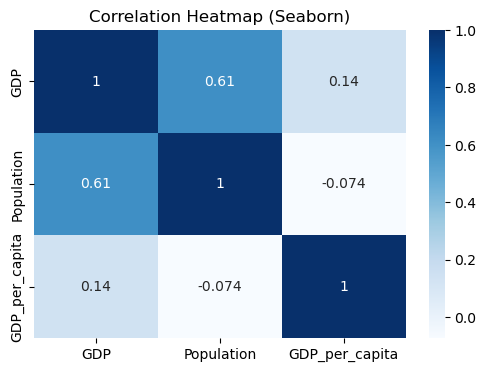

In [18]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(
    merged[["GDP", "Population", "GDP_per_capita"]].corr(),
    annot=True,
    cmap="Blues"
)
plt.title("Correlation Heatmap (Seaborn)")
plt.show()


In [19]:
#GDP vs Population (Scatter Plot – Seaborn)

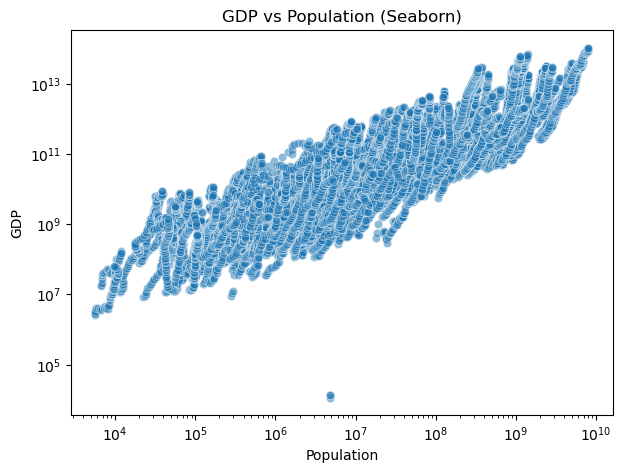

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=merged, x="Population", y="GDP", alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.title("GDP vs Population (Seaborn)")
plt.show()


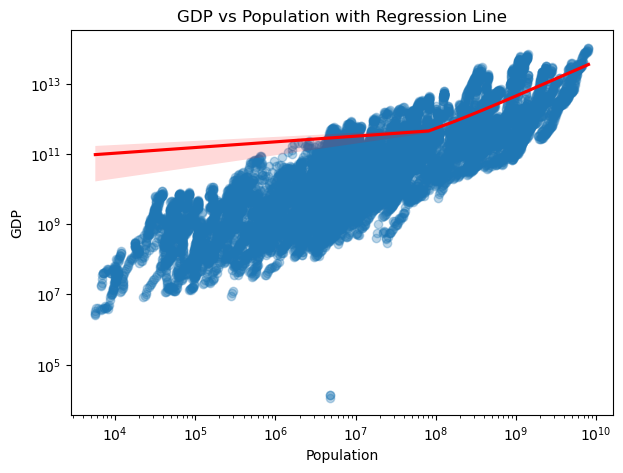

In [21]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=merged,
    x="Population",
    y="GDP",
    scatter_kws={"alpha":0.3},
    line_kws={"color":"red"}
)
plt.xscale("log")
plt.yscale("log")
plt.title("GDP vs Population with Regression Line")
plt.show()


In [22]:
#TIME–BASED STRUCTURAL ANALYSIS
#GDP Indexed Growth (Base Year = 100)

#Shows relative growth, not absolute size.

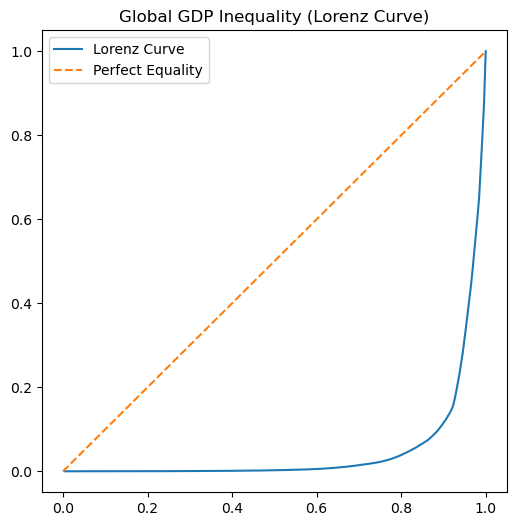

In [23]:
import numpy as np

year = 2020
gdp_sorted = merged[merged["Year"] == year]["GDP"].sort_values()
cum_gdp = np.cumsum(gdp_sorted) / gdp_sorted.sum()
cum_pop = np.arange(1, len(cum_gdp)+1) / len(cum_gdp)

plt.figure(figsize=(6,6))
plt.plot(cum_pop, cum_gdp, label="Lorenz Curve")
plt.plot([0,1],[0,1], linestyle="--", label="Perfect Equality")
plt.legend()
plt.title("Global GDP Inequality (Lorenz Curve)")
plt.show()


In [24]:
#Pre vs Post Global Financial Crisis (2008)

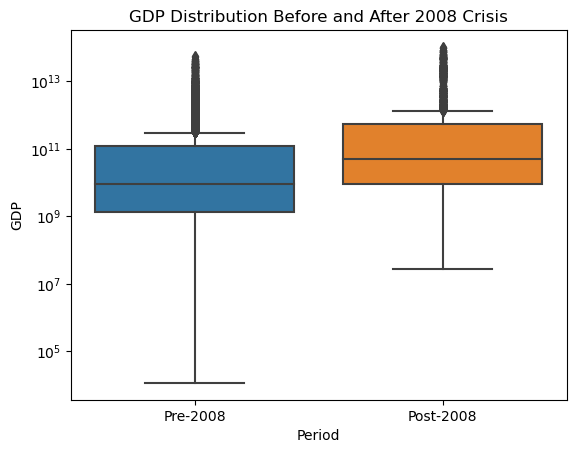

In [25]:
merged["Period"] = merged["Year"].apply(
    lambda x: "Pre-2008" if x < 2008 else "Post-2008"
)

sns.boxplot(data=merged, x="Period", y="GDP")
plt.yscale("log")
plt.title("GDP Distribution Before and After 2008 Crisis")
plt.show()


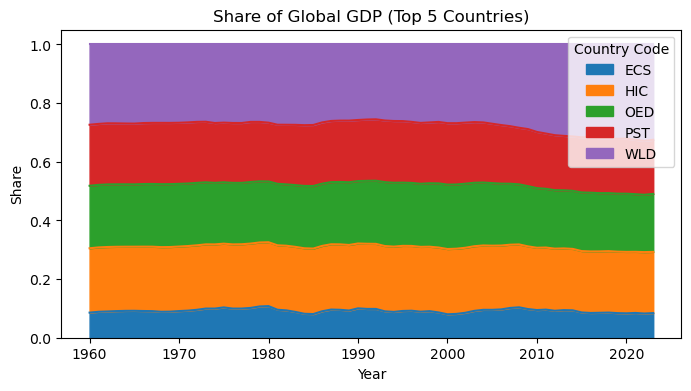

In [26]:
top = merged.groupby("Country Code")["GDP"].mean().nlargest(5).index
share = merged[merged["Country Code"].isin(top)]

pivot = share.pivot_table(values="GDP", index="Year", columns="Country Code")
pivot = pivot.div(pivot.sum(axis=1), axis=0)

pivot.plot.area(figsize=(8,4))
plt.title("Share of Global GDP (Top 5 Countries)")
plt.ylabel("Share")
plt.show()


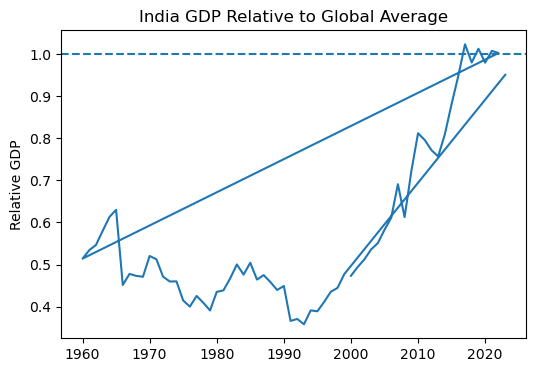

In [27]:
global_avg = merged.groupby("Year")["GDP"].mean().reset_index(name="Global_Avg_GDP")
rel = merged.merge(global_avg, on="Year")

rel["GDP_relative"] = rel["GDP"] / rel["Global_Avg_GDP"]

india = rel[rel["Country Code"]=="IND"]

plt.figure(figsize=(6,4))
plt.plot(india["Year"], india["GDP_relative"])
plt.axhline(1, linestyle="--")
plt.title("India GDP Relative to Global Average")
plt.ylabel("Relative GDP")
plt.show()
